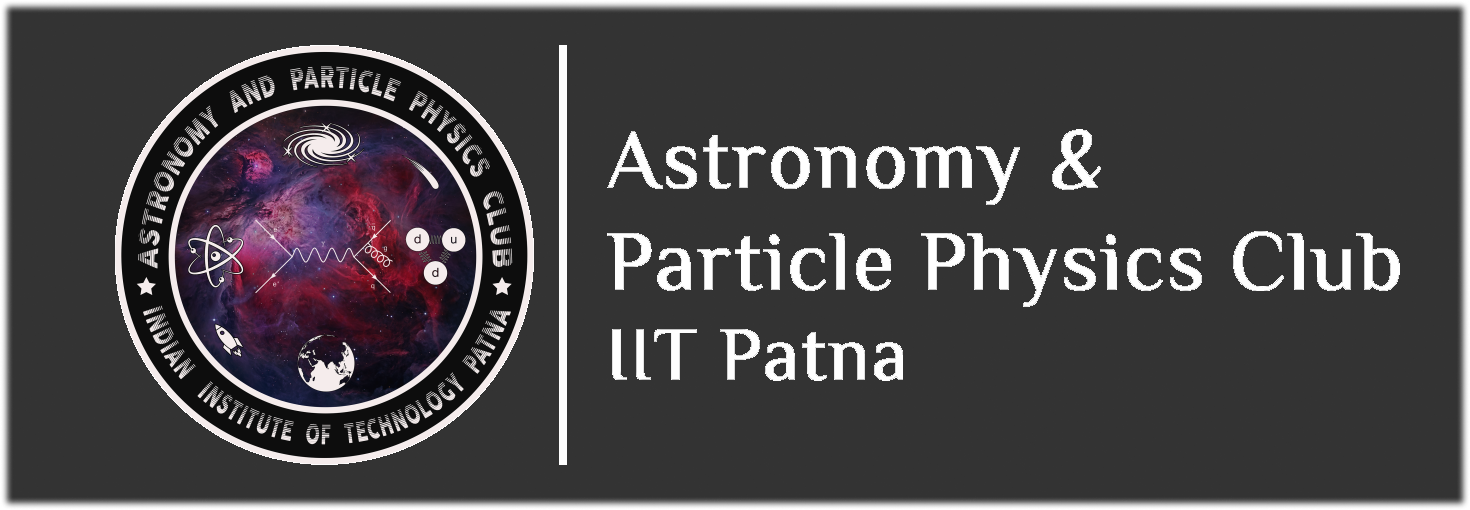

The Astronomy and Particle Physics Club, IIT Patna welcomes you to the second round of Astro-Particle Voyage, this round is a dive into Astronomical Data Science (ADS). You are required to submit the downloaded ".ipynb" file of this notebook after writing your solutions. \
\
Link for submission:[APV_23'_ADS](https://forms.gle/wjNtKdgkm839a18U7)

Here are some resources that would be helpful for this round:\
[Python Basics](https://colab.research.google.com/drive/1bZgRbTVbvXss6zxh7kLrrcWfWxwmzm9s?usp=sharing)\
[Basic Data Science Libraries: NumPy and Pandas](https://colab.research.google.com/drive/1u-YDj4OC-aVArXrqisikYXmbFbZUaw0n?usp=sharing)\
[Basic Machine Learning Implementation](https://colab.research.google.com/drive/1A8F4xKOP9j7PtorL_SCX0N3-a5V96oSn?usp=sharing) \

\
All the resources herein have been compiled and made available by the AP Club, IIT Patna.

# Problem Statement 1.

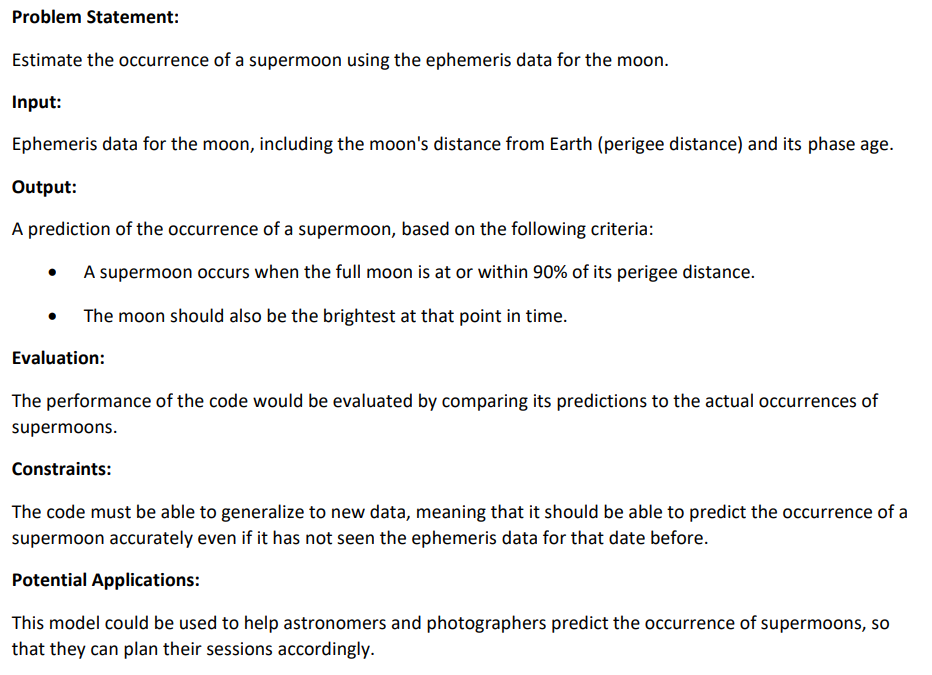

Link to the dataset: https://github.com/DespCAP/APV_2023/raw/main/ephemeris_moon.csv


NOTE: An error of 1 day before or after the actual occurance of the supermoon won't be considerred incorrect :)

FYI: The dataset contains the [ephemeris](https://en.wikipedia.org/wiki/Ephemeris) data of the moon according to IIT Patna's logitude and latitude ( 25.54°N; 84.85°E )!

## Your workspace

In [13]:
import csv

# Function to determine if it's a full moon based on age
def is_full_moon(age):
    # Assuming a full moon occurs around 14.8 days old
    return abs(age - 14.8) < 1  # You can adjust the tolerance as needed

# Define the criteria for a supermoon
#def is_supermoon(earth_dist, age):
 #   return earth_dist <= 0.01  # Assuming Earth Dist is in AU, where 1 AU is about 149.6 million kilometers
def is_supermoon(earth_dist,age):
    #perigee_distance = 0.00257 
    perigee_distance = 0.00240645 # 90% of perigee distance in AU
    return earth_dist <= perigee_distance

# Open and read the CSV file
with open("ephemeris_moon.csv", "r") as csvfile:
    reader = csv.DictReader(csvfile)

    # Process the data and identify supermoons
    supermoons = []
    for row in reader:
        earth_dist = float(row["Earth Dist (AU)"])
        age_str = row["Age of Moon"]
        
        # Extract the numerical age (e.g., 16 days)
        age = float(age_str.split()[0])
        
        if is_supermoon(earth_dist, age) and is_full_moon(age):
            supermoons.append(row)

# Print the dates of supermoons
for supermoon in supermoons:
    print(f"Supermoon on {supermoon['Year']} {supermoon['Month']} {supermoon['Day']}")


Supermoon on 2024 Aug 19
Supermoon on 2024 Sep 17
Supermoon on 2024 Sep 18
Supermoon on 2024 Oct 16
Supermoon on 2024 Oct 17
Supermoon on 2024 Nov 15
Supermoon on 2024 Nov 16
Supermoon on 2025 Oct 6
Supermoon on 2025 Nov 4
Supermoon on 2025 Nov 5
Supermoon on 2025 Dec 4
Supermoon on 2025 Dec 5


## Hints

### Supermoon

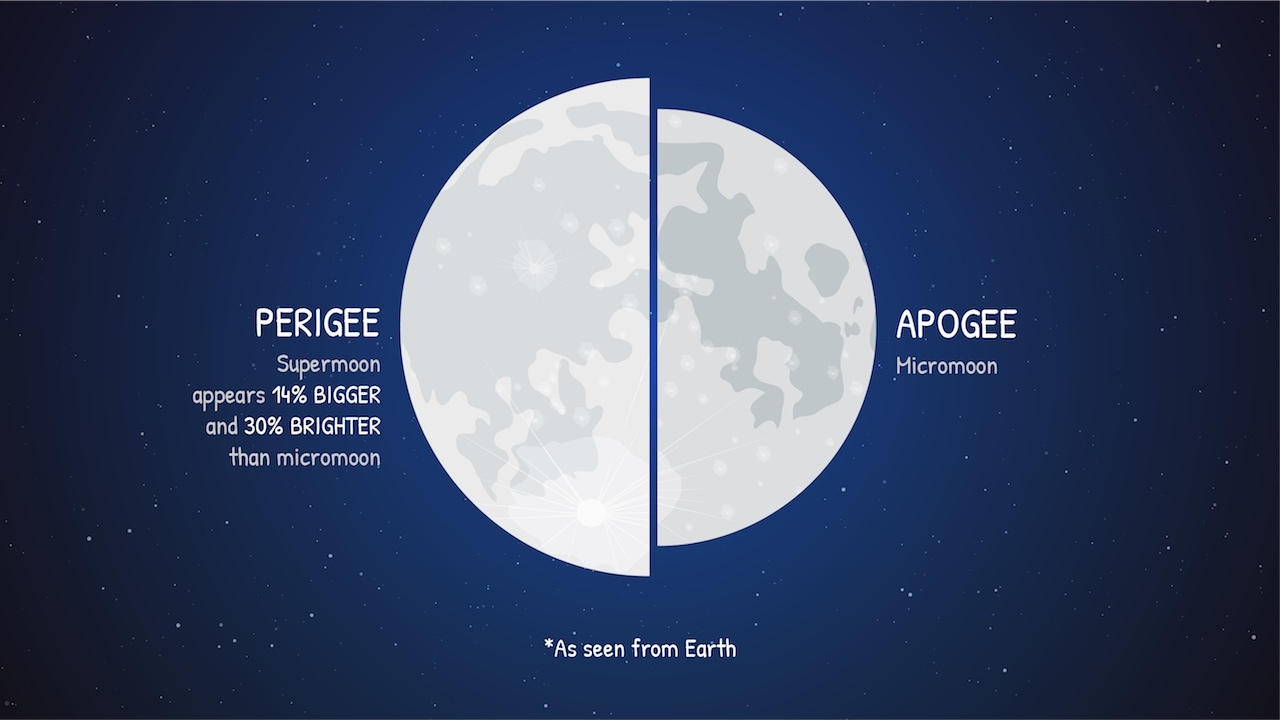

Use the distance from Earth to determine when is the moon closest to Earth (360,000 kilometers) and that instant also has to be when it's a full moon.

### Age of moon and the phase

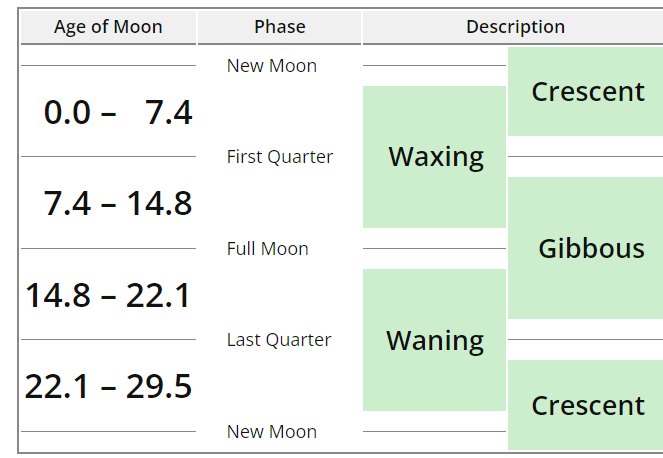

# Problem Statement 2.

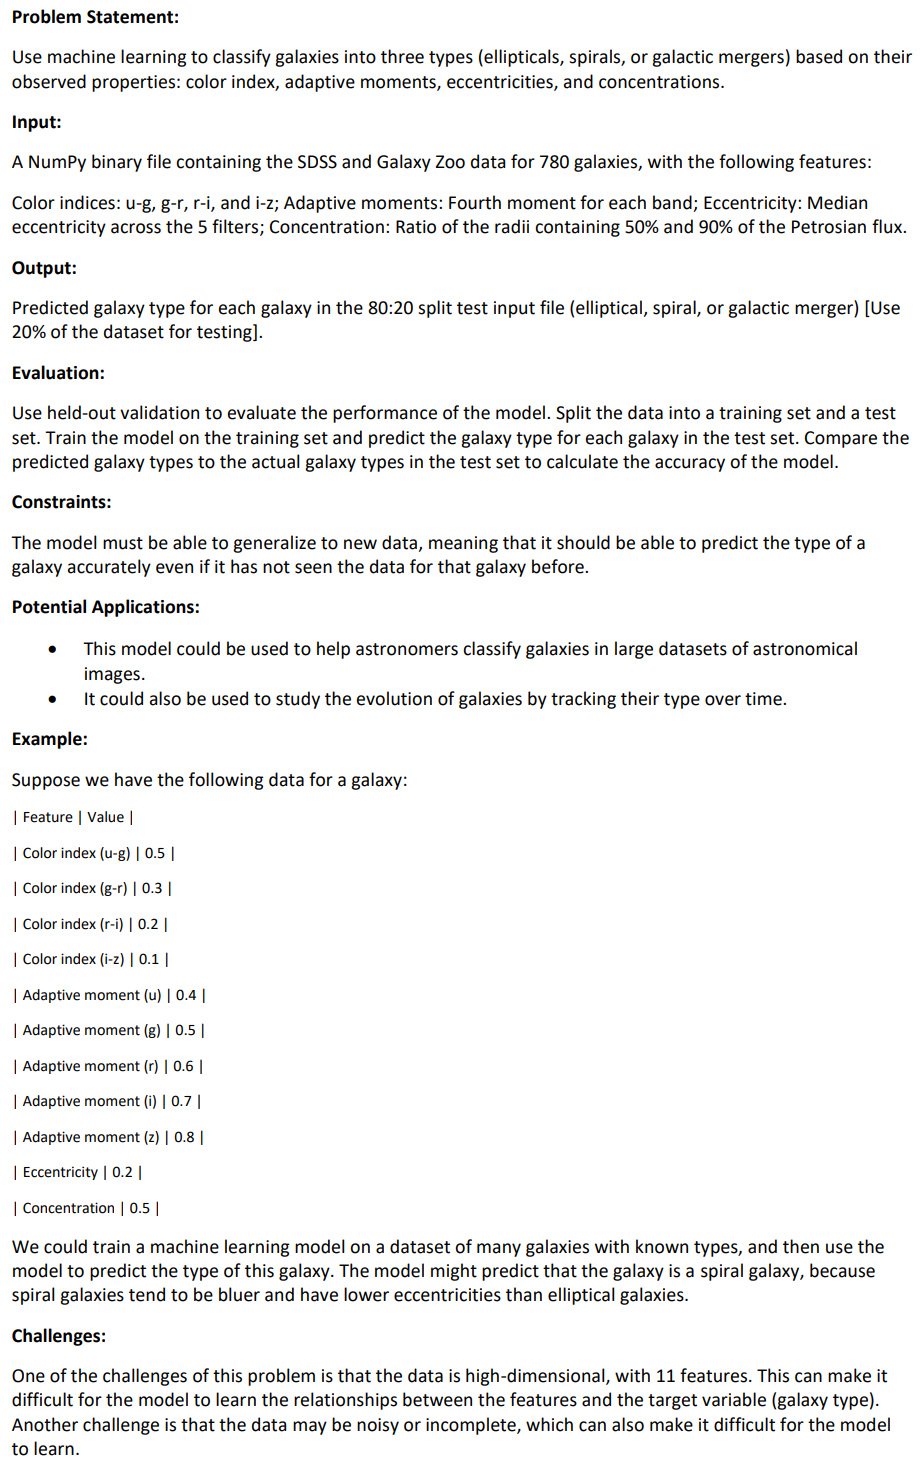

Link to the dataset: https://github.com/DespCAP/APV_2023/raw/main/galaxy_catalogue.npy

## Your workspace

In [1]:
# Write your code here
import numpy as np
import pandas as pd
from io import BytesIO
import requests

# Define the GitHub URL for the .npy file
github_url = "https://github.com/DespCAP/APV_2023/raw/main/galaxy_catalogue.npy"

# Send an HTTP GET request to the GitHub URL
response = requests.get(github_url)

# Load the .npy file from the response content
npy_data = np.load(BytesIO(response.content))

# Convert the numpy array to a Pandas DataFrame
dt = pd.DataFrame(npy_data)

In [2]:
dt.head()

,u-g,g-r,r-i,i-z,ecc,m4_u,m4_g,m4_r,m4_i,m4_z,petroR50_u,petroR50_r,petroR50_z,petroR90_u,petroR90_r,petroR90_z,class
0,1.85765,0.67158,0.42310,0.30610,0.585428,2.251946,2.339849,2.380652,2.359738,2.395528,3.095123,3.818919,3.826230,5.174814,8.263009,11.477340,merger
1,1.74259,0.86085,0.44927,0.28851,0.749812,2.031566,2.084156,2.092272,2.124075,2.133154,1.430436,1.422533,1.385727,3.732712,3.416921,3.330347,merger
2,2.10697,0.96710,0.56810,0.33747,0.630089,1.992887,2.450746,2.473116,2.465324,2.438683,3.099957,3.623704,3.463300,9.110857,8.354343,11.265390,merger
3,1.22840,0.60446,0.39049,0.28913,0.668999,2.056115,2.182252,2.309510,2.391414,2.472397,3.627267,4.063471,3.717708,9.580675,12.202420,11.826220,merger
4,1.80792,0.78124,0.45528,0.35067,0.500170,2.259167,2.194723,2.264567,2.334713,2.352568,3.256751,3.153533,2.254511,9.206746,9.790146,6.636931,merger


In [3]:
missing_values = dt.isna().sum()
print(missing_values)

u-g           0
g-r           0
r-i           0
i-z           0
ecc           0
m4_u          0
m4_g          0
m4_r          0
m4_i          0
m4_z          0
petroR50_u    0
petroR50_r    0
petroR50_z    0
petroR90_u    0
petroR90_r    0
petroR90_z    0
class         0
dtype: int64


In [4]:
# Calculate concentration for 'u' filter
dt['conc_u'] = dt['petroR50_u'] / dt['petroR90_u']

# Calculate concentration for 'r' filter
dt['conc_r'] = dt['petroR50_r'] / dt['petroR90_r']

# Calculate concentration for 'z' filter
dt['conc_z'] = dt['petroR50_z'] / dt['petroR90_z']

In [5]:
dt.head()

,u-g,g-r,r-i,i-z,ecc,m4_u,m4_g,m4_r,m4_i,m4_z,petroR50_u,petroR50_r,petroR50_z,petroR90_u,petroR90_r,petroR90_z,class,conc_u,conc_r,conc_z
0,1.85765,0.67158,0.42310,0.30610,0.585428,2.251946,2.339849,2.380652,2.359738,2.395528,3.095123,3.818919,3.826230,5.174814,8.263009,11.477340,merger,0.598113,0.462170,0.333373
1,1.74259,0.86085,0.44927,0.28851,0.749812,2.031566,2.084156,2.092272,2.124075,2.133154,1.430436,1.422533,1.385727,3.732712,3.416921,3.330347,merger,0.383216,0.416320,0.416091
2,2.10697,0.96710,0.56810,0.33747,0.630089,1.992887,2.450746,2.473116,2.465324,2.438683,3.099957,3.623704,3.463300,9.110857,8.354343,11.265390,merger,0.340249,0.433751,0.307428
3,1.22840,0.60446,0.39049,0.28913,0.668999,2.056115,2.182252,2.309510,2.391414,2.472397,3.627267,4.063471,3.717708,9.580675,12.202420,11.826220,merger,0.378602,0.333005,0.314361
4,1.80792,0.78124,0.45528,0.35067,0.500170,2.259167,2.194723,2.264567,2.334713,2.352568,3.256751,3.153533,2.254511,9.206746,9.790146,6.636931,merger,0.353735,0.322113,0.339692


In [6]:
# Separate features (X) and target (y)
X = dt[['u-g', 'g-r', 'r-i', 'i-z', 'ecc', 'm4_u', 'm4_g', 'm4_r', 'm4_i', 'm4_z', 'conc_u', 'conc_r', 'conc_z']]  # Features
y = dt['class']  # Galaxy types (labels)

In [7]:
from sklearn.model_selection import train_test_split
# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
import warnings
# Filter out the FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

In [9]:
from sklearn.preprocessing import StandardScaler
# Step 4: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model 1: RandomForest

In [10]:
from sklearn.ensemble import RandomForestClassifier
# Step 5: Model Selection
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [11]:
# Step 6: Model Training
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
# Step 7: Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8589743589743589


Hyperparameter Tuning

In [14]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

In [15]:
from sklearn.model_selection import GridSearchCV
# Grid Search for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [16]:
# Get the best hyperparameters
best_params = grid_search.best_params_

# Train a model with the best hyperparameters
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)
best_rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10, random_state=42)

In [17]:
# Model Evaluation
y_pred = best_rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Accuracy: {accuracy}')
print(f'Best Hyperparameters: {best_params}')

Best Accuracy: 0.8846153846153846
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


Model 2: SVM

In [18]:
from sklearn.svm import SVC

# Create and train the SVM classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Model Evaluation
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Accuracy: {accuracy}')

SVM Accuracy: 0.8397435897435898


Hyperparameter tuning

In [23]:
# Define the hyperparameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
}

In [24]:
# Grid Search for hyperparameter tuning
grid_search_svm = GridSearchCV(estimator=svm_classifier, param_grid=param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [25]:
# Get the best hyperparameters for SVM
best_params_svm = grid_search_svm.best_params_

In [26]:
# Train an SVM model with the best hyperparameters
best_svm_classifier = SVC(**best_params_svm)
best_svm_classifier.fit(X_train, y_train)

SVC(C=10)

In [28]:
# Model Evaluation
y_pred = best_svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Accuracy: {accuracy}')
print(f'Best Hyperparameters: {best_params_svm}')

Best Accuracy: 0.8782051282051282
Best Hyperparameters: {'C': 10, 'kernel': 'rbf'}


Model 3: Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

# Create and train the Logistic Regression classifier
logistic_classifier = LogisticRegression(max_iter=1000)
logistic_classifier.fit(X_train, y_train)

# Model Evaluation
y_pred = logistic_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy}')

Logistic Regression Accuracy: 0.8012820512820513


Model 4: KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Model Evaluation
y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN Accuracy: {accuracy}')

KNN Accuracy: 0.8205128205128205


Hyperparameter Tuning

In [29]:
# Define the hyperparameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
}

In [30]:
# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

In [31]:
# Grid Search for hyperparameter tuning
grid_search_knn = GridSearchCV(estimator=knn_classifier, param_grid=param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [32]:
# Get the best hyperparameters for KNN
best_params_knn = grid_search_knn.best_params_

In [33]:
# Train a KNN model with the best hyperparameters
best_knn_classifier = KNeighborsClassifier(**best_params_knn)
best_knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [34]:
# Model Evaluation
y_pred = best_knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Accuracy: {accuracy}')
print(f'Best Hyperparameters: {best_params_knn}')

Best Accuracy: 0.8205128205128205
Best Hyperparameters: {'n_neighbors': 3, 'weights': 'distance'}


Model 5: Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)

# Model Evaluation
y_pred = decision_tree_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {accuracy}')

Decision Tree Accuracy: 0.7756410256410257


Hyperparameter Tuning

In [35]:
# Define the hyperparameter grid for Decision Tree
param_grid_decision_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [36]:
# Grid Search for hyperparameter tuning
grid_search_decision_tree = GridSearchCV(estimator=decision_tree_classifier, param_grid=param_grid_decision_tree, cv=5, scoring='accuracy')
grid_search_decision_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [37]:
# Get the best hyperparameters for Decision Tree
best_params_decision_tree = grid_search_decision_tree.best_params_

In [38]:
# Train a Decision Tree model with the best hyperparameters
best_decision_tree_classifier = DecisionTreeClassifier(**best_params_decision_tree)
best_decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=4,
                       min_samples_split=10)

In [39]:
# Model Evaluation
y_pred = best_decision_tree_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Accuracy: {accuracy}')
print(f'Best Hyperparameters: {best_params_decision_tree}')

Best Accuracy: 0.7884615384615384
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [40]:
from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoost classifier with a base estimator (e.g., Decision Tree)
ada_classifier = AdaBoostClassifier(base_estimator=best_decision_tree_classifier, n_estimators=50, random_state=0)

# Train the AdaBoost model
ada_classifier.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         min_samples_leaf=4,
                                                         min_samples_split=10),
                   random_state=0)

In [41]:
# Model Evaluation
y_pred = ada_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Accuracy: {accuracy}')
#print(f'Best Hyperparameters: {best_params_decision_tree}')

Best Accuracy: 0.9038461538461539


Model 6: Naiye Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB

# Create and train the Naive Bayes classifier
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)

# Model Evaluation
y_pred = naive_bayes_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Naive Bayes Accuracy: {accuracy}')

Naive Bayes Accuracy: 0.6666666666666666


## Hints

The features that we will be using to do our galaxy classification are colour index, adaptive moments, eccentricities and concentrations. These features are provided as part of the SDSS catalogue.

### Features that can be used directly

**Colour indices** are the colours (u-g, g-r, r-i, and i-z):
Studies of galaxy evolution tell us that spiral galaxies have younger star populations and therefore are 'bluer' (brighter at lower wavelengths). Elliptical galaxies have an older star population and are brighter at higher wavelengths ('redder').

**Eccentricity (ecc)**: approximates the shape of the galaxy by fitting an ellipse to its profile. Eccentricity is the ratio of the two axis (semi-major and semi-minor). The De Vaucouleurs model was used to attain these two axis. To simplify our experiments, we will use the median eccentricity across the 5 filters.

**Adaptive moments(m4_u,m4_g,m4_r,m4_i,m4_z):** are a measured quantity to describe the shape of a galaxy. They are used in image analysis to detect similar objects at different sizes and orientations. We use the fourth moment here for each band.

### Concentration Calculation

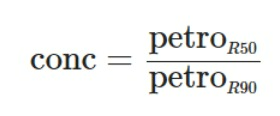

**Concentration** is similar to the luminosity profile of the galaxy, which measures what proportion of a galaxy's total light is emitted within what radius. A simplified way to represent this is to take the ratio of the radii containing 50% and 90% of the Petrosian flux.
The Petrosian method allows us to compare the radial profiles of galaxies at different distances.


The calculation has to be done for all the filters: ( 'u', 'r' and 'z' )

### Loading a '.npy' file as a Pandas dataframe

In [ ]:
import numpy as np
import pandas as pd
from io import BytesIO
import requests

# Define the GitHub URL for the .npy file
github_url = "https://github.com/xyz.npy"

# Send an HTTP GET request to the GitHub URL
response = requests.get(github_url)

# Load the .npy file from the response content
npy_data = np.load(BytesIO(response.content))

# Convert the numpy array to a Pandas DataFrame
dt = pd.DataFrame(npy_data)

# Problem Statement 3.

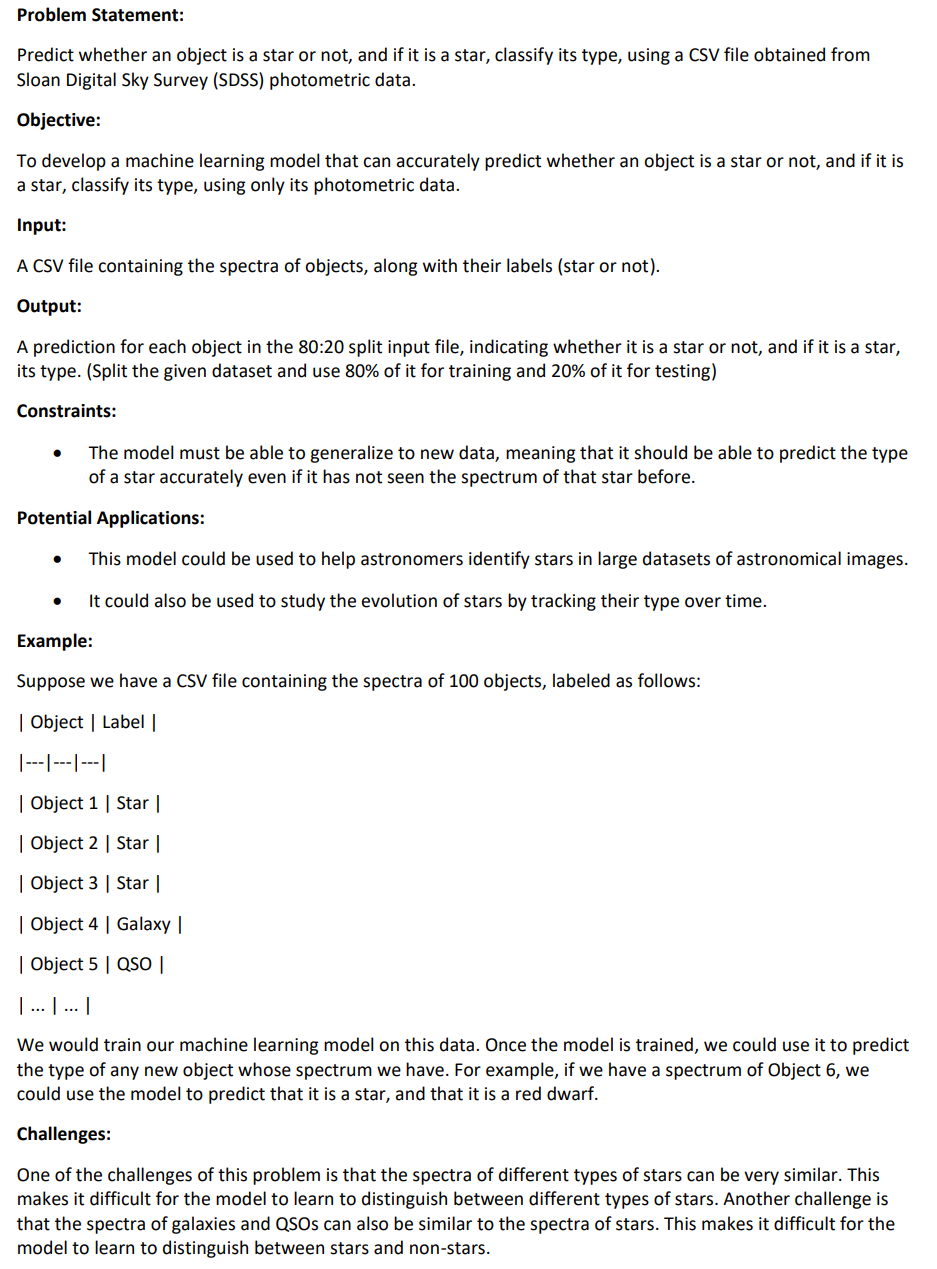

Star Classification to be followed:

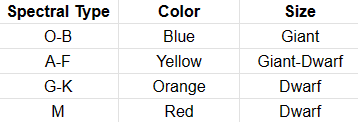

Link to the dataset: https://github.com/DespCAP/APV_2023/raw/main/star_classification.csv

## Your workspace

In [ ]:
# Write your code here




## Hints

### Calculating STI from photometric data

The Spectral Type Index (STI) is a photometric index used in astronomy to provide a rough estimate of the spectral type of a celestial object, typically stars. It is derived from the differences in brightness (magnitude) measured in specific photometric filters, often u, g, r, i, and z. The STI is a simplified way to gauge the spectral characteristics of a star without the need for high-resolution spectroscopy.

Here's how the STI is typically calculated:
\
\
**STI = 0.82(u - g) - 0.46(g - r) + 0.44(r - i) - 0.21(i - z)**


In [ ]:
# It is important to note that the STI is not a perfect predictor of spectral type.
# Other factors, such as metallicity and extinction, can also affect the STI of a star.
# Therefore, it is important to use caution when using the STI to predict the spectral type of a star.

Classifying Stars based on u,g,r,i,z photometric system: [Further reading](https://doi.org/10.1086/339311)

### STI to spectral type

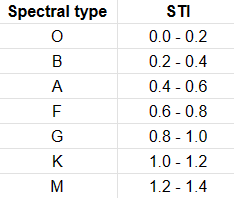

# Additional resources

Ephemeris Dataset: [In-The-Sky.org](https://in-the-sky.org/ephemeris)

GitHub repository of all datasets: https://github.com/DespCAP/APV_2023

Python tutorial: [W3Schools_Python](https://www.w3schools.com/python/default.asp)

Pandas tutorial: [W3Schools_Pandas](https://www.w3schools.com/python/pandas/default.asp)

Interactive hands-on courses: [Kaggle_Learn](https://www.kaggle.com/learn)

Google Colab tutorial: [Google Colab Tutorial](https://colab.research.google.com/drive/16pBJQePbqkz3QFV54L4NIkOn1kwpuRrj?usp=sharing)



---
NOTEBOOK PREPARED BY: AMOY ASHESH (amoy.ashesh@gmail.com)
